# AI IMAGE CLASSIFIER & ENHANCER

### Description

#### Скачиваем dataset из kaggle или других ресурсов
1. https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection (для обучения модели)
2. https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces (на случай необходимости дообучения модели)

### Motivation (описание задачи)

Задача включает в себя классификацию изображений с использованием сверточных нейронных сетей (CNN) для распознавания поддельных или отредактированных изображений
включая изображения документов, людей, животных, транспортных средств, предметов и т.д.

### Introduction (существующие подходы и релевантные работы)

#### Cуществующие подходы

В данной задаче бинарной классификации изображений на категории «реальные» и «поддельные» применены методы глубинного обучения, в частности сверточные нейронные сети (CNN). 

Архитектура CNN представляет собой простую, последовательную модель с использованием сверточных слоев в сочетании с пулинг-слоями и механизмами нормализации и регуляризации (Dropout, BatchNormalization), что способствует улучшению сходимости и снижению переобучения. 

Дополнительно применена кастомная стратегия остановки обучения, собственная модификация EarlyStopping. Это позволяет прерывать обучение модели при достижении заданной точности на валидационных данных, что оптимизирует процесс обучения и предотвращает излишнюю подгонку под тренировочный набор.

В работе использованы практики построения и обучения нейросетевых моделей для классификации изображений, сочетающие базовые и адаптированные методы, применяемые в машинномом обучении, в частности в компьютерном зрении.


Релевантные архитектуры: VGG, ResNet, EfficientNet и другие. Эти архитектуры показывают высокую эффективность в задачах компьютерного зрения, включая детекцию поддельных изображений, обнаружение дипфейков и оценку достоверности визуального контента.

Также существуют подходы с использованием аугментации данных и методов transfer learning, позволяющих значительно ускорить обучение и повысить обобщающую способность моделей за счет использования предварительно обученных весов. Одним из современных и производительных подходов является использование моделей EfficientNet, которые обеспечивают высокое качество распознавания при меньшем количестве параметров и меньших вычислительных затратах. Эти модели доступны в библиотеке TensorFlow и могут быть дообучены на пользовательских датасетах с помощью transfer learning. Data Augmentation может включать RandomFlip, RandomRotation, RandomZoom, повышающие обобщающую способность модели.

Существующие архитектуры, такие как VGGNet, ResNet и Inception, являются эффективными базовыми моделями, которые часто используются в качестве основы при решении задач классификации изображений, включая детекцию дипфейков и поддельных медиа.


Релевантные работы включают:

"DeepFake Detection using CNN" — архитектура MesoNet, ориентированная на выявление дипфейков.
"XceptionNet for deepfake detection" — применение модели Xception, предобученной на ImageNet, к задаче детектирования подделок.

Применяемые методы:

Data Augmentation: RandomFlip, RandomRotation, RandomZoom - повышают обобщающую способность модели.
Early Stopping и Custom Callbacks — позволяют прерывать обучение при достижении нужного уровня точности или при отсутствии улучшений, как реализовано в данной работе.
Fine-tuning (дообучение) — использование предварительно обученных моделей и их адаптация к конкретной задаче (transfer learning), как показано во второй фазе обучения модели в проекте.

Таким образом, данная работа опирается на базовые CNN-принципы и может быть дополнительно улучшена за счет использования более мощных и предобученных архитектур. 


### Description (технический подход, который использовали в проекте)

### Технический подход

В рамках проекта реализован модуль бинарной классификации изображений на классы «Real» и «Fake» с применением методов глубокого обучения на базе фреймворка TensorFlow/Keras. Вся система включает этапы предварительной обработки данных, построения модели, обучения, валидации, оценки и интеграции пользовательского интерфейса для интерактивного тестирования.

#### 1. Подготовка данных

Данные были загружены из директории с помощью tf.keras.utils.image_dataset_from_directory. 

Предобработка изображений: 
Для обеспечения корректного ввода данных в модель используется ресайзинг и нормализация. Также реализована дополнительная предобработка изображений в оттенках серого и с одним каналом, с учетом возможных различий в каналах изображения (например, ч/б изображения были преобразованы в RGB), что улучшает стабильность модели.

Все изображения были приведены к единому размеру 32x32 пикселя и нормализованы (пиксельные значения приведены к диапазону [0, 1]). 

После этого данные были разделены на три выборки:

70% – обучающая
20% – валидационная
10% – тестовая


#### 2. Архитектура модели

Модель реализована с использованием Sequential API и включает следующие компоненты:

Три блока сверточных слоев Conv2D с фильтрами 16, 32 и 64
Между блоками используются MaxPooling2D и BatchNormalization для стабилизации обучения
Dropout слои (по 25%) добавлены для регуляризации
После сверток используется Flatten и два Dense слоя, где финальный слой имеет активацию sigmoid для бинарной классификации


#### 3. Обучение модели

Модель обучалась с использованием оптимизатора Adam и функции потерь BinaryCrossentropy. Основной метрикой служила accuracy. Для остановки переобучения применялся кастомный callback (CustomEarlyStopping), который завершал обучение, если точность на валидации достигала 93%.

Дополнительно реализована визуализация истории обучения (графики Loss и Accuracy), что позволяет анализировать динамику качества модели.

#### 4. Оценка качества модели

Для количественной оценки качества моделей используются метрики бинарной классификации: Precision, Recall и BinaryAccuracy, что позволяет полноценно оценить производительность и поведение модели на тестовой выборке, сбалансированность модели, а также оценить способность модели различать реальные и поддельные изображения с высокой точностью, особенно в условиях дисбаланса классов.


#### 5. Предсказание и интерфейс

Модель сохранена в формате .keras и интегрирована в пользовательский интерфейс на базе Tkinter + CustomTkinter, где пользователь может выбрать изображение, визуализировать его и получить предсказание (Real/Fake). Предварительная обработка изображения перед подачей в модель включает изменение размера и нормализацию.
Прогнозы классификации выводятся на экран в виде текста: REAL IMAGE или IMAGE MIGHT BE AI-GENERATED OR EDITED.

#### 6. Дообучение (Fine-tuning)

Обучение с использованием EarlyStopping и дообучение моделей:
Применение обратного распространения ошибки и использование критериев остановки (EarlyStopping) для предотвращения переобучения моделей является стандартной  практикой при обучении модели. 

На последнем этапе предусмотрена возможность размораживания слоев модели и дообучения с меньшей скоростью обучения (learning_rate=1e-5, то есть 0.00001) для повышения точности на новых данных, что актуально при переносе обучения (Transfer Learning).


#### Denoising и super-resolution

В данном проекте реализован подход к улучшению качества изображений с использованием двух ключевых методов: удаление шума (denoising) и увеличение разрешения (super-resolution). Эти методы позволяют повысить качество исходных изображений как перед их классификацией так и для улучшения качества изображений загружаемых пользователем, что реализовано в этом проекте как опция. Подход интегрирован в графический пользовательский интерфейс (GUI) с использованием Tkinter и CustomTkinter для взаимодействия с пользователем.


#### 1. Удаление шума (Denoising)

Для удаления шума используется функция cv2.fastNlMeansDenoisingColored(), которая применяет алгоритм Нейтральных Средних (Non-Local Means). Этот алгоритм эффективно убирает шум, сохраняя детали и текстуры изображения. Входные параметры задают силу фильтрации, а также настройки для цветных изображений:

def denoise_image(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
None указывает на то, что нет изображения, которое будет использоваться как пример для восстановления.

Параметры 10, 10, 7, 21 отвечают за силу денойсинга и параметры поиска соседей.


#### 2. Увеличение разрешения (Super-Resolution)

Для увеличения разрешения изображения используется функция cv2.resize(), которая выполняет интерполяцию с использованием метода INTER_CUBIC. Это позволяет увеличить размер изображения в два раза с целью улучшения визуального восприятия:

def super_resolution(image):
    # Увеличение изображения
    sr = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    return sr
Параметры fx=2, fy=2 указывают на увеличение размера изображения в два раза по осям X и Y.


#### 3. Порядок применения на изображении

Сначала изображение очищается от шума с помощью denoising.
Затем оно подвергается увеличению разрешения с помощью super-resolution.
Полученные изображения затем визуализируются с помощью Matplotlib, и пользователь может увидеть улучшенную версию изображения.

img_denoised = denoise_image(img)
img_sr = super_resolution(img_denoised)
plt.imshow(img_sr)
plt.title('Super-Resolution Image')
plt.show()


### Графический интерфейс

Для удобства пользователя реализован интерфейс, позволяющий:
Загружать изображение.
Применять методы улучшения качества (удаление шума и увеличение разрешения).
Сохранять результаты в файл.
Изменять тему интерфейса между светлой и темной.


#### Процесс работы с изображением состоит из следующих этапов:

Пользователь загружает изображение.
Изображение классифицируется моделью.
Применяются улучшения (удаление шума и увеличение разрешения). При необходимости. 
Результаты обработки отображаются на экране, и пользователь может сохранить изображение.


#### Преимущества подхода

Удобство интерфейса: Графический интерфейс позволяет пользователю легко взаимодействовать с системой тестируя различные изображения в интерактивном режиме
Многофункциональность: Система позволяет не только классифицировать изображения, но и улучшать их качество с помощью методов обработки изображений.


#### Заключение
В данном проекте реализован подход, который сочетает методы предобработки изображений с нейросетями для классификации на базе фреймворка TensorFlow/Keras, включая расширенные возможности для визуализации, оценки и обработки изображений. Это позволяет повысить точность модели и предоставляет пользователю удобный инструмент для работы с изображениями. Также применение денойсинга и увеличения разрешения, перед обучением модели, может улучшить качество изображений перед классификацией, что может повысить точность модели.



### Demo (демонстрация работы) - App AIImageClassifier.exe

Для демонстрации работы приложения достаточно запустить AIImageClassifier.exe и выбрать необходимое изображение для его классификации. Это касается изображений
на которых модель не обучалась. 

### Results (оценка результатов и эффективности системы, сильные/слабые стороны)

#### Оценка результатов и эффективности модели

#### Итоговые метрики:

Train Accuracy: 93.16%
Validation Accuracy: 93.15%
Precision: 92.55%
Recall: 93.87%
Общая Accuracy: 93.22%

Модель демонстрирует достаточно сбалансированные показатели по точности, полноте и общей эффективности.

#### Сильные стороны:

Высокая обобщающая способность — разница между train и validation accuracy минимальна (0.01%), что говорит об отсутствии переобучения.
Хороший баланс между precision и recall: модель одинаково хорошо справляется как с ложноположительными, так и с ложноотрицательными случаями.
Успешная остановка обучения (EarlyStopping) на 37-й эпохе — до наступления переобучения, при стабильном снижении val_loss.


#### Слабые стороны:

Слабые стороны:
Флуктуации в валидационной потере наблюдались на ранних эпохах (8–20), но были стабилизированы к моменту остановки.
Модель может быть чувствительна к изменению порога классификации — желательно провести калибровку (например, по ROC-кривой).
Сильная зависимость от порога (0.61) — бинарная классификация может выигрывать от калибровки порога (например, через ROC-кривую).


Пороговое значение можно откалибровать по ROC или PR-кривой для повышения чувствительности в зависимости от приоритетов задачи.
Возможно добавить калибровку порога (например, через sklearn.metrics.roc_curve и precision_recall_curve) так можно получить лучший баланс между Recall и Precision.
Для повышения Recall, возможно, слегка дисбалансировать потери или увеличить веса фейкового класса.
Протестировать модель на финальном независимом датасете, не участвовавшем в обучении/валидации, чтобы подтвердить обобщающую способность.

Переобучения, вроде, не наблюдается


#### Conclusions (будущая работа и возможные улучшения)

В будущем, что наиболее вероятно, будет использоваться одна из существующих моделей, например: EfficientNetB3 или ResNet50, а затем, при необходимости Vision Transformer (ViT) или SwinTransformer. Возможно будут использованы другие модели такие как: EfficientNet В0-B7, ResNet101, ConvNeXt и т.д.

Будущее развитие проекта предусматривает определение поддельных (созданных с помощью нейросетей) или отредактированных документов: фото, подписи, логотипы, печати и 
т.д. как часть разработки системы безопасности при проведении транзакций.

#### Libraries

In [2]:
import os
import cv2
import sys
import imghdr

import numpy as np
import tkinter as tk
import tensorflow as tf

import customtkinter as ctk
from tkinter import filedialog
from PIL import ImageTk, Image
from matplotlib import pyplot as plt
from tkinter import filedialog, messagebox

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.callbacks import Callback, TensorBoard, EarlyStopping
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization, RandomFlip, RandomRotation, RandomZoom

C:\Users\Asus\AppData\Local\Temp\ipykernel_40528\1930859430.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


#### GPU Memory Optimization

In [189]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


#### Загрузка данных

In [190]:
# data = tf.keras.utils.image_dataset_from_directory(r'C:/Users/Asus/Desktop/Computer_vision/AIImageClassifier/CW_AI_Image_Classifier/data', image_size=(32, 32))
data = tf.keras.utils.image_dataset_from_directory(r'C:/Users/Asus/Desktop/Computer_vision/CW/data', image_size=(32, 32))
data_it = data.as_numpy_iterator()
batch = data_it.next()

Found 102041 files belonging to 2 classes.


#### Приведение к размеру 32x32x3 и нормализация

In [191]:
processed_images = []

# Итерируем по батчам в данных
for images, labels in data:
    for img in images:
        img = cv2.resize(img.numpy(), (32, 32))  # Приводим к размеру 32x32
        if len(img.shape) == 2:  # Если изображение в оттенках серого
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif img.shape[2] == 1:  # Если изображение с 1 каналом
            img = np.repeat(img, 3, axis=2)  # Дублируем каналы
        processed_images.append(img)

# Преобразовываем обработанные изображения в numpy массив и выполняем нормализацию
images = np.array(processed_images) / 255.0  # Нормализация
labels = np.array(labels)  # Добавляем метки

#### Визуализация первых 12 изображений

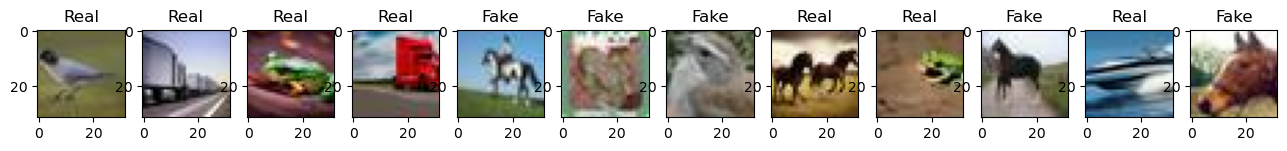

In [192]:
fig, ax = plt.subplots(ncols=12, figsize=(16, 16))
for idx, img in enumerate(batch[0][:12]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text("Fake" if batch[1][idx] else "Real")
plt.show()

#### Масштабирование и разделение на обучающую, валидационную и тестовую выборки

In [ ]:
data = data.map(lambda x, y: (x / 255, y))  # Нормализация

# # Применяем batching до разделения
# batch_size = 2232  
# data = data.batch(batch_size)

data = data.map(lambda x, y: (x / 255, y))  # Нормализация

total_size = len(data)
train_size = int(total_size * 0.7)
validation_size = int(total_size * 0.2)
test_size = total_size - train_size - validation_size

train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size + validation_size).take(test_size)

#### Модель с добавлением слоев

In [194]:
model = Sequential([
    Input(shape=(32, 32, 3)),  # Входной слой, принимает изображения 32x32 с 3 каналами (RGB)
    Conv2D(16, (4, 4), activation='relu'), # Сверточный слой: 16 фильтров размером 4x4, извлекает признаки
    MaxPooling2D(), # Пулинговый слой уменьшает размерность, обобщает признаки
    BatchNormalization(), # Нормализация: ускоряет обучение, стабилизирует сеть
    Conv2D(32, (4, 4), activation='relu'), # Еще один сверточный слой с 32 фильтрами
    MaxPooling2D(),  # Снижаем размерность
    BatchNormalization(), # Нормализация после второго блока
    Dropout(0.25), # Случайным образом отключает 25% нейронов для минимизации переобучения
    Conv2D(64, (4, 4), activation='relu'), # Третий сверточный слой с 64 фильтрами
    MaxPooling2D(), # Снижаем размерность
    BatchNormalization(), # Нормализация после третьего блока
    Dropout(0.25), # Регуляризация
    Flatten(), # Преобразует многомерный тензор в одномерный вектор
    Dense(64, activation='relu'), # Полносвязный (Dense) слой с 64 нейронами и ReLU-активацией
    Dropout(0.25),  # Dropout для Dense слоя
    Dense(1, activation='sigmoid') # Выходной слой: 1 нейрон с сигмоидой — для бинарной классификации (Real/Fake)
])

model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 29, 29, 16)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 14, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 11, 11, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 2, 2, 64)       │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 1, 1, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,513 (181.69 KB)

 Trainable params: 46,289 (180.82 KB)

 Non-trainable params: 224 (896.00 B)

#### Кастомный EarlyStopping

In [195]:
class CustomEarlyStopping(Callback):
    def __init__(self, threshold=0.93):
        super().__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')
        if val_accuracy is not None and val_accuracy >= self.threshold:
           print(
    f"\nEpoch {epoch + 1}: val_accuracy reached "
    f"{val_accuracy:.4f} >= {self.threshold:.2f}, stopping training."
    # print(f"\nEpoch {epoch + 1}: val_accuracy reached {val_accuracy:.4f} >= {self.threshold:.2f}, stopping training.")
)
        self.model.stop_training = True  # Останавливаем обучение
early_stopping = CustomEarlyStopping(threshold=0.93)

#### Обучение модели

In [ ]:
logdir = r'C:/Users/Asus/Desktop/Computer_vision/AIImageClassifier/CW_AI_Image_Classifier/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(
    train,
    epochs=50,
    validation_data=validation,
    callbacks=[tensorboard_callback, early_stopping], # Кастомный early stopping
    verbose=1
)

# tensorboard --logdir=logs/fit
# tensorboard --logdir=C:/Users/Asus/Desktop/Computer_vision/AIImageClassifier/CW_AI_Image_Classifier/logs
# http://localhost:6006


Epoch 1/50
2232/2232 ━━━━━━━━━━━━━━━━━━━━ 119s 52ms/step - accuracy: 0.7768 - loss: 0.4717 - val_accuracy: 0.5446 - val_loss: 0.8093
Epoch 2/50
2232/2232 ━━━━━━━━━━━━━━━━━━━━ 146s 54ms/step - accuracy: 0.8692 - loss: 0.3106 - val_accuracy: 0.8910 - val_loss: 0.2661
Epoch 3/50
2232/2232 ━━━━━━━━━━━━━━━━━━━━ 124s 55ms/step - accuracy: 0.8861 - loss: 0.2774 - val_accuracy: 0.9032 - val_loss: 0.2332
Epoch 4/50
2232/2232 ━━━━━━━━━━━━━━━━━━━━ 121s 54ms/step - accuracy: 0.8924 - loss: 0.2586 - val_accuracy: 0.8566 - val_loss: 0.3158
Epoch 5/50
2232/2232 ━━━━━━━━━━━━━━━━━━━━ 125s 56ms/step - accuracy: 0.8961 - loss: 0.2469 - val_accuracy: 0.8909 - val_loss: 0.2650
Epoch 6/50
2232/2232 ━━━━━━━━━━━━━━━━━━━━ 100s 45ms/step - accuracy: 0.9026 - loss: 0.2353 - val_accuracy: 0.8838 - val_loss: 0.2856
Epoch 7/50
2232/2232 ━━━━━━━━━━━━━━━━━━━━ 90s 40ms/step - accuracy: 0.9016 - loss: 0.2369 - val_accuracy: 0.9123 - val_loss: 0.2089
Epoch 8/50
2232/2232 ━━━━━━━━━━━━━━━━━━━━ 91s 41ms/step - accuracy: 0.

#### Визуализация. Графики потерь

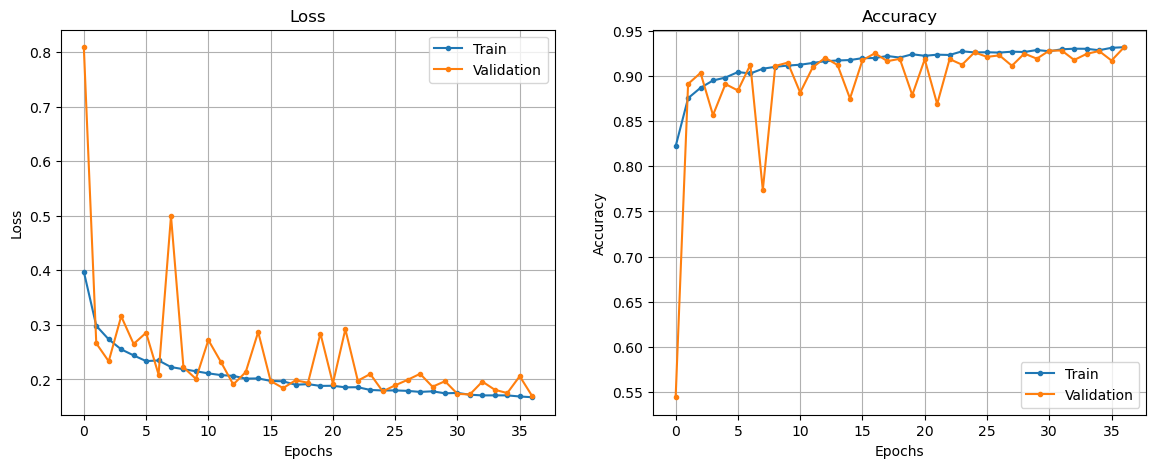

Train Accuracy:      0.9316336512565613
Validation Accuracy: 0.9314658641815186


In [197]:

def plot_history(history):
    h = history.history
    epochs_range = range(len(h['loss']))

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, h['loss'], '.-', epochs_range, h['val_loss'], '.-')
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, h['accuracy'], '.-', epochs_range, h['val_accuracy'], '.-')
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.show()

    print('Train Accuracy:     ', h['accuracy'][-1])
    print('Validation Accuracy:', h['val_accuracy'][-1])

plot_history(history)

#### Метрики и построение кривых

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

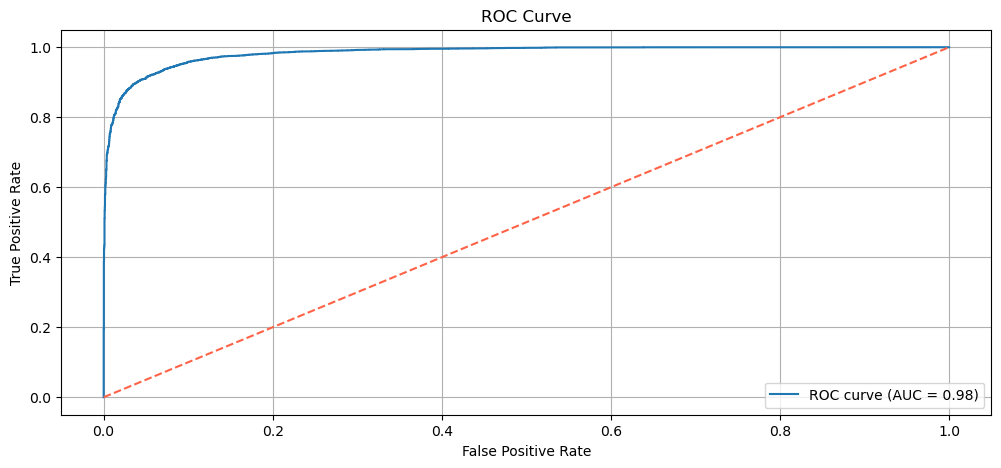

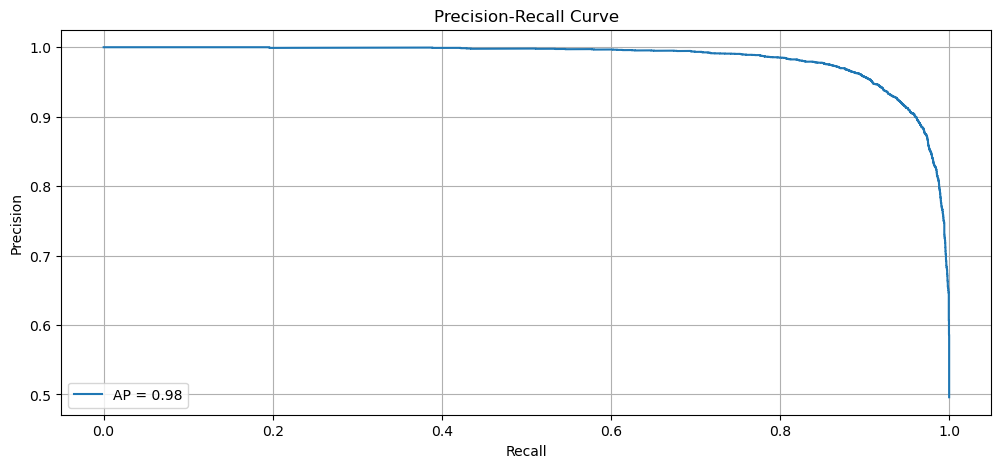

In [220]:
# Метрики Keras
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

# Для ROC и PR кривых
y_true_all = []
y_pred_proba_all = []

# Один проход по тестовой выборке
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)  # Предсказанные вероятности

    # Обновляем метрики Keras
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

    # Сохраняем для ROC/PR-кривых
    y_true_all.extend(y)
    y_pred_proba_all.extend(yhat.squeeze())

# Печать Keras метрик

print(f'Precision: {pre.result().numpy():.4f}')
print(f'Recall: {rec.result().numpy():.4f}')
print(f'Accuracy: {acc.result().numpy():.4f}')


# ROC-кривая
y_true_all = np.array(y_true_all)
y_pred_proba_all = np.array(y_pred_proba_all)

fpr, tpr, _ = roc_curve(y_true_all, y_pred_proba_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))  # Ширина графика
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="tomato")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Precision-Recall кривая

precision, recall, _ = precision_recall_curve(y_true_all, y_pred_proba_all)
ap_score = average_precision_score(y_true_all, y_pred_proba_all)

plt.figure(figsize=(12, 5))  # Ширина графика
plt.plot(recall, precision, label=f"AP = {ap_score:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


#### Сохранение модели

In [199]:
model.save('model/ai_imageclassifier.keras') 

#### Загрузка сохранённой модели

In [223]:
model = load_model('model/ai_imageclassifier.keras')

#### Подключаем tkinter для возможности динамического выбора изображений и тестирования точности модели

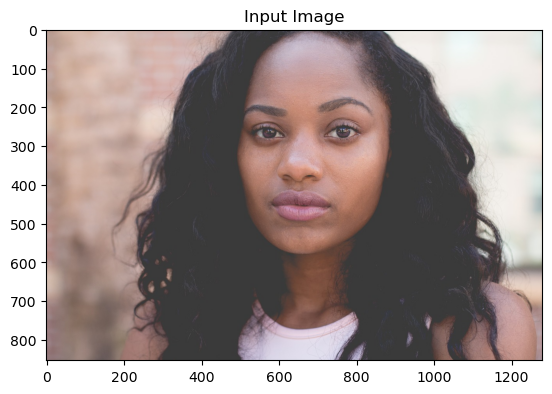

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Class: Real


In [ ]:
# Создаем и настраиваем главное окно
root = tk.Tk()
root.attributes('-topmost', True)  # Устанавливаем окно поверх всех
root.withdraw()  # Скрываем главное окно

file_path = filedialog.askopenfilename(title="Выберите изображение",
    filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])

# Чтение и предсказание
if file_path:
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("Input Image")
    plt.show()

    resize = tf.image.resize(img, (32, 32))
    y_pred = model.predict(np.expand_dims(resize / 255, 0))

    print("Predicted Class:", "Real" if y_pred > 0.61 else "Fake")
else:
    print("Файл не выбран.")

#### Дообучаем модель 

In [ ]:
# Загрузка модели
model = load_model('model/ai_imageclassifier.keras')

# Размораживаем только последние 6 слоев
for layer in model.layers[:-6]:
    layer.trainable = False

# Перекомпилируем модель
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Загружаем данные из директории
data = tf.keras.utils.image_dataset_from_directory(
    #    r'C:/Users/Asus/Desktop/Computer_vision/CW/data',
    r'C:/Users/Asus/Desktop/Computer_vision/AIImageClassifier/CW_AI_Image_Classifier/data',
    image_size=(32, 32),
    batch_size=32,
    label_mode='binary', 
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=123
)

validation = tf.keras.utils.image_dataset_from_directory(
    #  r'C:/Users/Asus/Desktop/Computer_vision/CW/data',
    r'C:/Users/Asus/Desktop/Computer_vision/AIImageClassifier/CW_AI_Image_Classifier/data',
    image_size=(32, 32),
    batch_size=32,
    label_mode='binary',
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=123
)

# Коллбек EarlyStopping
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

# Дообучение
# model.fit(data, epochs=50, validation_data=validation, callbacks=[early_stop])
history = model.fit(data, epochs=100, validation_data=validation, callbacks=[early_stop])


#### Отображаем графики после дообучения

In [ ]:
def plot_history(history):
    h = history.history
    epochs_range = range(len(h['loss']))

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, h['loss'], '.-', epochs_range, h['val_loss'], '.-')
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, h['accuracy'], '.-', epochs_range, h['val_accuracy'], '.-')
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.show()

    print('Train Accuracy:     ', h['accuracy'][-1])
    print('Validation Accuracy:', h['val_accuracy'][-1])

plot_history(history)

#### Вызываем тестовый интерфейс для проверки результатов

In [ ]:
# Создаем и настраиваем главное окно
root = tk.Tk()
root.attributes('-topmost', True)  # Устанавливаем окно поверх всех
root.withdraw()  # Скрываем главное окно

file_path = filedialog.askopenfilename(title="Выберите изображение", filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])

# Чтение и предсказание
if file_path:
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("Input Image")
    plt.show()

    resize = tf.image.resize(img, (32, 32))
    y_pred = model.predict(np.expand_dims(resize / 255, 0))

    print("Predicted Class:", "Real" if y_pred > 0.61 else "Fake")
else:
    print("Файл не выбран.")

#### Добавляем функции Super-Resolution и Denoising

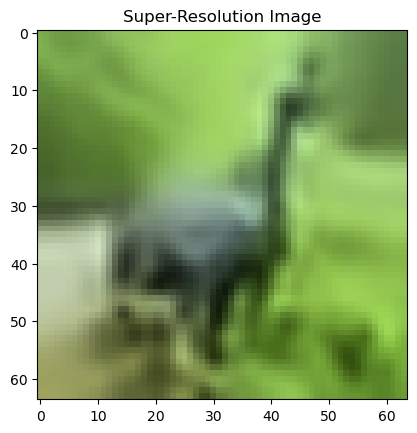

In [17]:
# Применение Denoising (удаление шума) с использованием фильтра
def denoise_image(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

# Применение Super-Resolution (увеличение разрешения)
def super_resolution(image):
    # Увеличение изображения
    sr = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    return sr

# Применение на изображении
img_denoised = denoise_image(img)
img_sr = super_resolution(img_denoised)

# Визуализация улучшенных изображений
plt.imshow(img_sr)
plt.title('Super-Resolution Image')
plt.show()

#### Добавляем полноценный интерфейс который будет использоваться в приложении. Исполняемый файл app.py

In [ ]:
import tkinter as tk
import customtkinter as ctk
from tkinter import filedialog, messagebox
from PIL import ImageTk, Image
import cv2
import numpy as np
import tensorflow as tf
import os
import sys

def resource_path(relative_path): # Возвращает абсолютный путь к файлу (необходим при упаковке с PyInstaller (создание AIImageClassifier.exe))
    
    if hasattr(sys, '_MEIPASS'):
        return os.path.join(sys._MEIPASS, relative_path) # Если запускается как .exe, ищет файл в папке с ресурсами
    return os.path.join(os.path.abspath("."), relative_path)  # Иначе использует текущую директорию

model_path = resource_path("model/ai_imageclassifier.keras") # Указываем путь к модели
model = tf.keras.models.load_model(model_path) # Загружаем модель

img = None # Оригинальное изображение
img_sr = None  # Улучшенное изображение
img_label = None # Элемент интерфейса для отображения изображения
result_label = None # Элемент интерфейса для вывода результата


# Удаляем элементы интерфейса и сбрасываем состояния (в основном этот метод написан для переопределения кнопок и возврату к форме исходного отображения интерфейса после загрузки)
def reset_interface():
    
    global img_label, result_label, img, img_sr
    if img_label:
        img_label.destroy()
        img_label = None
    if result_label:
        result_label.destroy()
        result_label = None
    img = None
    img_sr = None
    
    # Показываем/скрываем нужные кнопки
    load_btn.pack(pady=10)
    enhance_btn.pack_forget()
    change_btn.pack_forget()
    save_btn.pack_forget()
    cancel_btn.pack_forget()

def resize_to_fit(image_array, max_size=350): # Изменяем размер изображения пропорционально, чтобы вписать его в max_size
    
    height, width = image_array.shape[:2]
    
    if width > height:
        new_width = max_size
        new_height = int(max_size * height / width)
    else:
        new_height = max_size
        new_width = int(max_size * width / height)
    return cv2.resize(image_array, (new_width, new_height), interpolation=cv2.INTER_AREA)

def load_and_predict():
    
    global img, img_label, result_label
    file_path = filedialog.askopenfilename(  # Диалог выбора файла
        title="Select Image",
        filetypes=[("Image files", "*.jpg;*.jpeg;*.png")]
    )
    if not file_path:
        messagebox.showinfo("Info", "No file selected.") # Выводим сообщение, если файл не выбран
        return

    try:
        img = cv2.imread(file_path)  # Чтение изображения
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Преобразование BGR в RGB

        preview = resize_to_fit(img, max_size=350) # Создание миниатюры (имеется ввиду отображаемое изображение)
        preview_pil = Image.fromarray(preview)
        preview_imgtk = ImageTk.PhotoImage(image=preview_pil)
        
        # Создание или обновление метки изображения в интерфейсе
        if img_label:
            img_label.configure(image=preview_imgtk)
            img_label.image = preview_imgtk
        else:
            img_label = tk.Label(root, image=preview_imgtk, bg=root["bg"], bd=0, highlightthickness=0)
            img_label.image = preview_imgtk
            img_label.pack(pady=5)

        # Подготовка изображения для модели и предсказание
        resize = tf.image.resize(img, (32, 32))
        y_pred = model.predict(np.expand_dims(resize / 255, 0), verbose=0)

        result = "REAL IMAGE" if y_pred[0] > 0.61 else "IMAGE MIGHT BE AI-GENERATED OR EDITED"

        # Отображение результата
        if result_label:
            result_label.configure(text=result)
        else:
            result_label = ctk.CTkLabel(root,
                                        text=result,
                                        font=("Arial", 18, "bold"),
                                        text_color="#1E90FF")
            result_label.pack(pady=5)

        # Обновление состояния кнопок
        enhance_btn.pack(pady=10)
        change_btn.pack(pady=10)
        load_btn.pack_forget()
        save_btn.pack_forget()
        cancel_btn.pack_forget()

    except Exception as e:
        messagebox.showerror("Error", str(e)) # Вывод ошибки

def enhance_image():
    global img, img_sr, img_label
    if img is None:
        messagebox.showwarning("Warning", "Please load an image first.")
        return
    # Подробное описание img_denoised = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    # src (img) - исходное изображение
    # dst=None - место хранения результата (если None — будет возвращено значение)
    # h=10 - степень фильтрации для яркостного канала
    # hColor=10 - степень фильтрации для цветовых каналов
    # templateWindowSize=7 - размер окна шаблона (в пикселях)
    # searchWindowSize=21 - размер окна поиска (в пикселях)
    try:
        img_denoised = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21) # Удаление шумов и масштабирование
        
        img_sr = cv2.resize(img_denoised, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        preview = resize_to_fit(img_sr, max_size=350)
        preview_pil = Image.fromarray(preview)
        preview_imgtk = ImageTk.PhotoImage(image=preview_pil)

        if img_label:
            img_label.configure(image=preview_imgtk)
            img_label.image = preview_imgtk

        # Активируем кнопки
        save_btn.configure(state="normal")
        save_btn.pack(pady=10)
        cancel_btn.configure(state="normal")
        cancel_btn.pack(pady=10)

        enhance_btn.pack_forget()
        change_btn.pack_forget()

    except Exception as e:
        messagebox.showerror("Error", str(e))


def save_result():
    global img_sr
    if img_sr is None:
        messagebox.showwarning("Warning", "Please enhance the image first.")
        return

    try:
        os.makedirs("results", exist_ok=True)  # Создаём директорию, если она не существует

        base_name = "enhanced_image"
        ext = ".png"
        counter = 1
        save_path = os.path.join("results", base_name + ext)

        # Проверка на существование файла, если существует — увеличиваем номер
        while os.path.exists(save_path):
            save_path = os.path.join("results", f"{base_name}({counter}){ext}")
            counter += 1

        # Сохраняем изображение
        cv2.imwrite(save_path, cv2.cvtColor(img_sr, cv2.COLOR_RGB2BGR)) # Сохраняем в BGR
        messagebox.showinfo("Saved", f"Image saved at {save_path}")
        reset_interface()

    except Exception as e:
        messagebox.showerror("Save Error", str(e))


# UI 
ctk.set_appearance_mode("light") # Устанавливаем тему
ctk.set_default_color_theme("blue") # Устанавливаем цветовую схему (по умолчанию) для цвета текста

root = ctk.CTk()  # Создаем главное окно
root.title("AI Image Classifier & Enhancer")
root.geometry("610x410") # Размеры главного окна
root.resizable(True, True)

# Background Image
try:
    background_image = Image.open(resource_path("background.jpg"))
    bg_resized = ImageTk.PhotoImage(background_image)
    background_label = tk.Label(root)
    background_label.place(relx=0, rely=0, relwidth=1, relheight=1)

    def resize_bg(event): # Адаптируем фон при изменении окна
        new_bg = background_image.resize((event.width, event.height))
        bg_img = ImageTk.PhotoImage(new_bg)
        background_label.config(image=bg_img)
        background_label.image = bg_img

    root.bind("<Configure>", resize_bg)
except:
    pass

# Logo
try:
    logo_image = Image.open(resource_path("logo.png")).resize((100, 100), Image.LANCZOS)
    logo = ImageTk.PhotoImage(logo_image)
    logo_label = tk.Label(root, image=logo, bg=root["bg"], bd=0, highlightthickness=0)
    logo_label.image = logo
    logo_label.pack(pady=10)
except:  # Показываем текст, если логотип не загружен
    logo_label = ctk.CTkLabel(root,
                              text="AI Image Classifier",
                              font=("Arial", 18, "bold"),
                              text_color="#1E90FF")
    logo_label.pack(pady=10)

# Custom Button Creator (подключаем кастомный tKinter так как обычный tKinter не позоляет манипуляции с кнопками такие как радиусы и т.д.)
def create_button(text, command):
    default_fg_color = "#1E90FF"
    hover_fg_color = "#87CEEB"
    default_text_color = "white"
    hover_text_color = "pink"

    btn = ctk.CTkButton(master=root,
                        text=text,
                        command=command,
                        fg_color=default_fg_color,
                        hover_color=hover_fg_color,
                        text_color=default_text_color,
                        corner_radius=3,
                        width=180,
                        height=40,
                        font=("Arial", 14, "bold"))

    def on_enter(e):  # Наведение мыши меняет курсор
        btn.configure(cursor="hand2",
                      fg_color=hover_fg_color,
                      text_color=hover_text_color)

    def on_leave(e):
        btn.configure(cursor="arrow",
                      fg_color=default_fg_color,
                      text_color=default_text_color)

    btn.bind("<Enter>", on_enter)
    btn.bind("<Leave>", on_leave)

    return btn

# Buttons
load_btn = create_button("Load Image", load_and_predict)
enhance_btn = create_button("Enhance Resolution", enhance_image)
change_btn = create_button("Change Image", load_and_predict)
save_btn = create_button("Save Result", save_result)
cancel_btn = create_button("Cancel", reset_interface)

load_btn.pack(pady=10)

# Theme Toggle Logic
current_theme = "light"

def toggle_theme():
    global current_theme
    if current_theme == "light":
        current_theme = "dark"
    else:
        current_theme = "light"
    ctk.set_appearance_mode(current_theme)

# Theme Switch Button (переключение темы)
def create_theme_button():
    default_fg_color = "#1E90FF"
    hover_fg_color = "#87CEEB"
    default_text_color = "white"
    hover_text_color = "pink"

    btn = ctk.CTkButton(master=root,
                        text="Theme",
                        command=toggle_theme,
                        fg_color=default_fg_color,
                        hover_color=hover_fg_color,
                        text_color=default_text_color,
                        width=100,
                        height=30,
                        font=("Arial", 12, "bold"))

    def on_enter(e):
        btn.configure(cursor="hand2",
                      fg_color=hover_fg_color,
                      text_color=hover_text_color)

    def on_leave(e):
        btn.configure(cursor="arrow",
                      fg_color=default_fg_color,
                      text_color=default_text_color)

    btn.bind("<Enter>", on_enter)
    btn.bind("<Leave>", on_leave)

    return btn

theme_btn = create_theme_button()
theme_btn.place(relx=1.0, rely=0.0, x=-10, y=10, anchor="ne")

def on_closing():
    root.destroy() # Завершение процесса

root.protocol("WM_DELETE_WINDOW", on_closing)

# Start App (Запуск главного цикла приложения)
root.mainloop()


## Документация для создания файла .exe (Windows) и .app (MacOS) упаковки и развертывания приложения

#### 1. Сoздаем директорию для хранения модели, данных (background.jpg, logo.png, requirements.txt, .ico, .icns etc.), инструкций и исполняемых файлов, например app.py
#### 2. Устанавливаем pyinstaller в cmd с помощью команды pip install pyinstaller
#### 3. Создаем файлы инструкций: app.spec и setup.py для создания .exe при вызове pyinstaller app.spec в cmd из директории проекта 
#### 4. Собираем зависимости в файл requirements.txt (команда !pip freeze > requirements.txt в ячейке Jupiter notebook). Файл сохраняется в директории проекта
#### 5. Скачиваем иконки для логотипов или приложения с сайта https://www.logoai.com например https://www.logoai.com/png/1360 (для нашего приложения)
#### 6. Конвертируем нашу иконку в формат .ico (Windows) онлайн https://convertico.com или в формат .icns (MacOs) онлайн https://cloudconvert.com/png-to-icns
#### 7. Скачиваем Inno Setup с ресурса https://jrsoftware.org/isinfo.php или сразу с https://jrsoftware.org/isdl.php
#### 8. Создаем установочный файл setup.iss который запускаем через приложение Inno Setup (этот файл должен быть в другой директории)

### Инструкции к исполняемому файлу app.py

#### 1. В app.py важно указать правильный путь к директории модели model_path = resource_path("model/ai_imageclassifier.keras") или model_path = resource_path("ai_imageclassifier.keras") если модель находится в одной директории с остальными файлами. При создании .exe желательно все файлы разместить в одной директории чтобы избежать проблем при запуске приложения.

#### Файл app.spec

block_cipher = None

a = Analysis(
    ['app.py'],
    pathex=['.'],
    binaries=[],
    datas=[
        ('ai_imageclassifier.keras', '.'),
        ('background.jpg', '.'),
        ('logo.png', '.')
    ],
    hiddenimports=[],
    hookspath=[],
    runtime_hooks=[],
    excludes=[],
    win_no_prefer_redirects=False,
    win_private_assemblies=False,
    cipher=block_cipher,
)

pyz = PYZ(a.pure, a.zipped_data, cipher=block_cipher)

exe = EXE(
    pyz,
    a.scripts,
    [],
    exclude_binaries=True,
    name='AIImageClassifier',
    debug=False,
    bootloader_ignore_signals=False,
    strip=False,
    upx=True,
    console=False,  # False чтобы не появлялась черная консоль
    icon='icon.ico',
    onefile=True  
)

coll = COLLECT(
    exe,
    a.binaries,
    a.zipfiles,
    a.datas,
    strip=False,
    upx=True,
    name='AIImageClassifier'
)


#### Файл setup.py

from setuptools import setup

APP = ['app.py']  # Указываем основной файл приложения
DATA_FILES = ['background.jpg', 'logo.png', 'ai_imageclassifier.keras']  # Перечисляем все дополнительные файлы, которые нужно упаковать
OPTIONS = {
    'argv_emulation': True,
    'packages': ['tensorflow', 'Pillow', 'cv2', 'numpy'],
    'resources': DATA_FILES,
    'excludes': ['tkinter', 'PyQt5'],
    'iconfile': 'icon.icns'  
}

setup(
    name='AI Image Classifier & Enhancer',
    app=APP,
    data_files=DATA_FILES,
    options={'py2app': OPTIONS},
    setup_requires=['py2app'],
)


#### Файл setup.iss

[Setup]
AppName=AI Image Classifier
AppVersion=1.0
DefaultDirName={pf}\AI Image Classifier
OutputBaseFilename=AIImageClassifier
Compression=lzma
SolidCompression=yes
DisableProgramGroupPage=yes
OutputDir=App #(или AIImageClassifier)

[Files]
Source: "dist\AIImageClassifier\AIImageClassifier.exe"; DestDir: "{app}"; Flags: ignoreversion
Source: "dist\AIImageClassifier\*"; DestDir: "{app}\AIImageClassifier"; Flags: ignoreversion recursesubdirs createallsubdirs